In [4]:
%matplotlib inline
import numpy 
import matplotlib.pyplot as plt

""" 
@author: Patrick

"""

## Plot Phase Diagrams

In [55]:
def f(x):
    return r + x*x

x = numpy.linspace(-4,4,100)

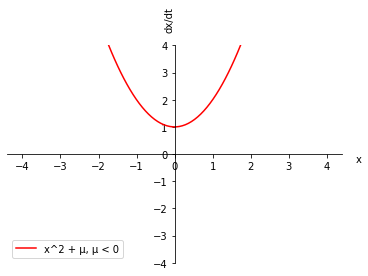

In [74]:
r = 1
d= f(x)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_ylim(-4,4)
ax.set_xlabel('x')
ax.set_ylabel('dx/dt')
ax.xaxis.set_label_coords(1.05, .5)
ax.yaxis.set_label_coords(0.5, 1.12)
plt.plot(x,d,'r', label= 'x^2 + μ, μ < 0')
plt.legend()

plt.savefig('Bifurcation, mu > 0.png')

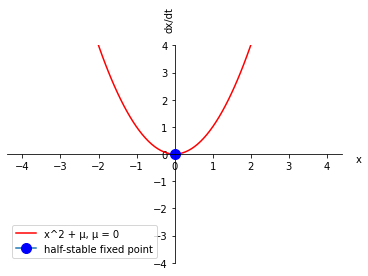

In [75]:
r = 0
d= f(x)



fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_ylim(-4,4)
ax.set_xlabel('x')
ax.set_ylabel('dx/dt')
ax.xaxis.set_label_coords(1.05, .5)
ax.yaxis.set_label_coords(0.5, 1.12)
plt.plot(x,d,'r', label='x^2 + μ, μ = 0')
plt.plot([0], [0], marker="o", markersize=10, markeredgecolor="blue", markerfacecolor="blue", label= 'half-stable fixed point')
plt.legend()

plt.savefig('Bifurcation, mu = 0.png')

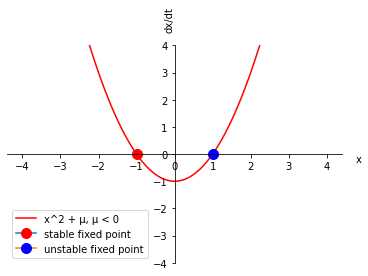

In [78]:
r = -1
d= f(x)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')



ax.set_ylim(-4,4)
ax.set_xlabel('x')
ax.set_ylabel('dx/dt', rotation='vertical')
ax.xaxis.set_label_coords(1.05, .5)
ax.yaxis.set_label_coords(0.5, 1.12)
plt.plot(x,d,'r', label= 'x^2 + μ, μ < 0')
plt.plot([-1], [0], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red", label= 'stable fixed point')
plt.plot([1], [0], marker="o", markersize=10, markeredgecolor="blue", markerfacecolor="blue", label= 'unstable fixed point')
plt.legend()

plt.savefig('Bifurcation, mu < 0.png')

## Plot Bifurcation Diagram

In [79]:
def bifurcation_plot(f,f_x,r,x,rlabel='μ'):
    
    """ produce a bifurcation diagram for a function f(r,x) given
        f and its partial derivative f_x(r,x) over a domain given by numpy arrays r and x
        
        f(r,x)  :  RHS function of autonomous ode dx/dt = f(r,x)
        f_x(r,x):  partial derivative of f with respect to x
        r       :  numpy array giving r coordinates of domain
        x       :  numpy array giving x coordinates of domain
        rlabel  :  string for x axis parameter label
    """
    
    # set up a mesh grid and extract the 0 level set of f
    R,X = numpy.meshgrid(r,x)
    plt.figure()
    
    
    CS = plt.contour(R,X,f(R,X),[0],colors='k')
    plt.clf()
    
    c0 = CS.collections[0]
    
    
    # for each path in the contour extract vertices and mask by the sign of df/dx
    for path in c0.get_paths():
        vertices = path.vertices
        vr = vertices[:,0]
        vx = vertices[:,1]
        mask = numpy.sign(f_x(vr,vx))
        stable = mask < 0.
        unstable = mask > 0.
        
        # plot the stable and unstable branches for each path
        plt.plot(vr[stable],vx[stable],'b')
        #plt.hold(True)
        plt.plot(vr[unstable],vx[unstable],'b--')
        
    
    
    plt.xlabel('parameter {0}'.format(rlabel))
    plt.ylabel('x')
    plt.legend(('stable','unstable'),loc='best')
    plt.xlim(r[0],r[-1])
    plt.ylim(x[0],x[-1])
    plt.savefig('bifurcation diagram')


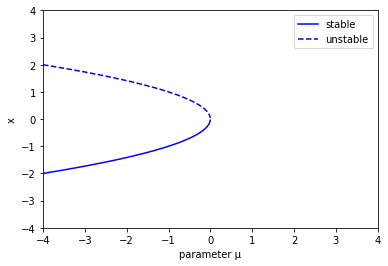

In [80]:
f = lambda r,x: r + x*x
f_x = lambda r,x: 2.*x

x = numpy.linspace(-4,4,100)
r = numpy.linspace(-4,4,100)

bifurcation_plot(f,f_x,r,x)
